# Big Data Mart Sales Problem

## Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

bigdatamart_Train.csv: This file is used for the model building purpose. 

bigdatamart_Test.csv: This file is used for getting predictions from the trained model. 

## Importing the libraries

In [456]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor



from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection  import cross_val_score

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('always')


## Loading the dataset

In [422]:
# Two data sets are provided for training model and testing the trained model 
#train data set is loaded to variable train which will be used for developing the model
# testing dataset will be loaded to variable test, this data will be used for testing of the prediction model , however 
#preprocessing of the data will be performed on testing data also but will not be used in model building

train=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")
test=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")

## Pre processing of the data

### Descriptive analysis of data

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


preliminary analysis of the sample data from train and test dataset it can be observed that train has 12 columns and test has 11 columns that makes it obvious that item_outlet_sales column in train is the taraget/label and It is a Regression problem. It is the total sales amount of item for store is to be predicted.

Null values are present in outlet_size, item_weight which has to be addressed

Categorical Data:
* Item_Identifier
* Item_Fat_Content
* Item_Type
* Outlet_size
* Outlet_Location_Type
* Outlet_Establishment_Year
* Outlet_Type
* Outlet_Identifier

Continuous Data:
* Item_Weight
* Item_Visibility
* Item_MRP
* Item_Outlet_Sales (Target variable)

In [280]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [281]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


* Nulls in item_weight
* outlet_establishment_year is categorical

In [282]:
train.shape, test.shape

((8523, 12), (5681, 11))

### Addressing null values of item_weight and outlet_size

In [423]:
train['Item_Weight'].isna().sum() , train['Outlet_Size'].isna().sum()

(1463, 2410)

Since item_weight is continuous and denotes the weight of item, mean imputation may give skewed results, will use
knn imputation technique for imputing the nulls in item_weight . knn imputation can be done at later stage
after the scaling and normalising the data. 
for now let us impute the outletsize with mode as it is categorical

In [424]:
#imputing the missing outlet_Size with mode
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [425]:
train['Outlet_Size'].isna().sum() , test['Outlet_Size'].isna().sum()

(0, 0)

Lets proceed with Univariate analysis
#### Univariate Analysis

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>,
        <AxesSubplot:title={'center':'Item_MRP'}>],
       [<AxesSubplot:title={'center':'Outlet_Establishment_Year'}>,
        <AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

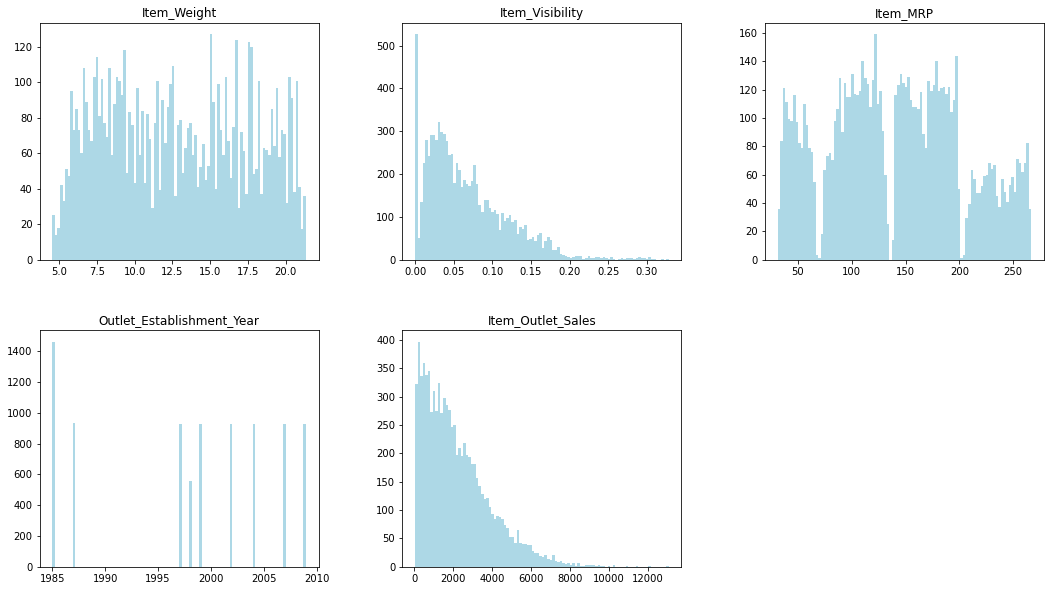

In [32]:
train.select_dtypes(include=['int64','float64'] ).hist(figsize=(18,10), grid=False, layout=(2, 3), bins = 100, color='lightblue')

Univariate Analysis Inference:
* Item_Weight : There is no clear understanding from item weight,also there are nulls which should be addressed
* Item_Visibility : It can be observed that majority of items have visibility zero and data is right skewed after 0.20                         which has to be addressed.
* Item_MRP: There is no continuous flow in item mrp, it can be observed that distribution is divided into four bins with
            visible gap between 60-70 , 140-150 , 200-210 approximately
* Outlet_Establishment_Year : It is categorical data and will check the count of items in further steps, but from this it                                 can be observed that there are no outlets opened between 1988 - 1996
* Item_outlet_sales : right skewness can be observed after 8000, but , as it is target variable no further steps will be                         taken on item_outlet_sales

In [36]:
train.select_dtypes(include=['object']).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

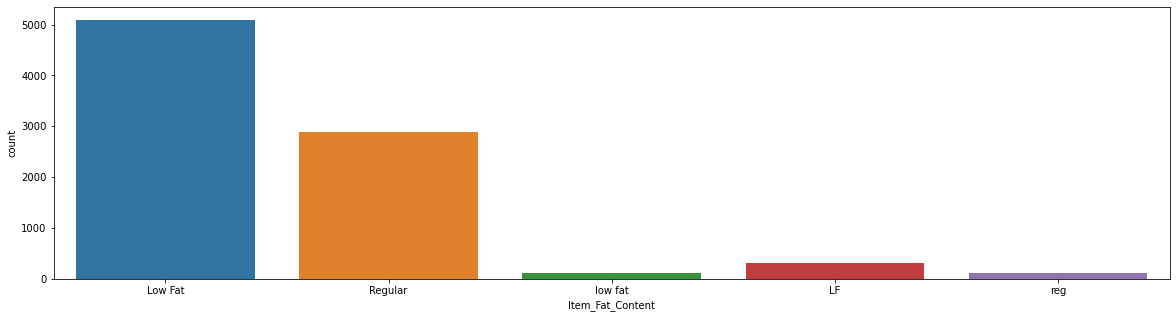

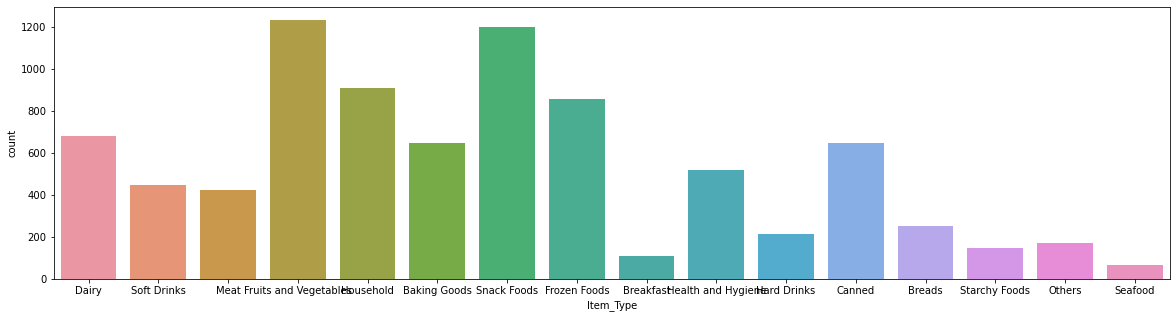

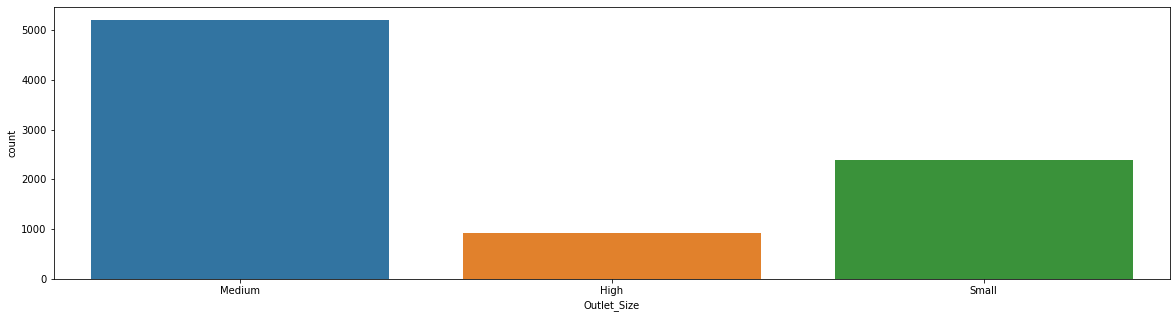

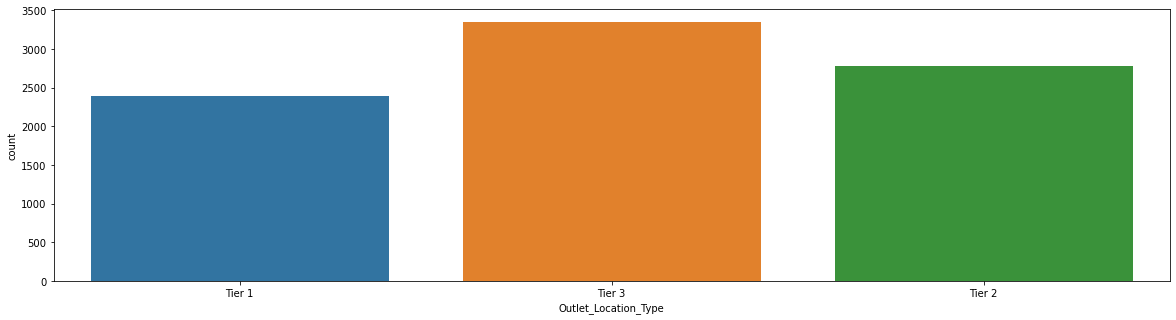

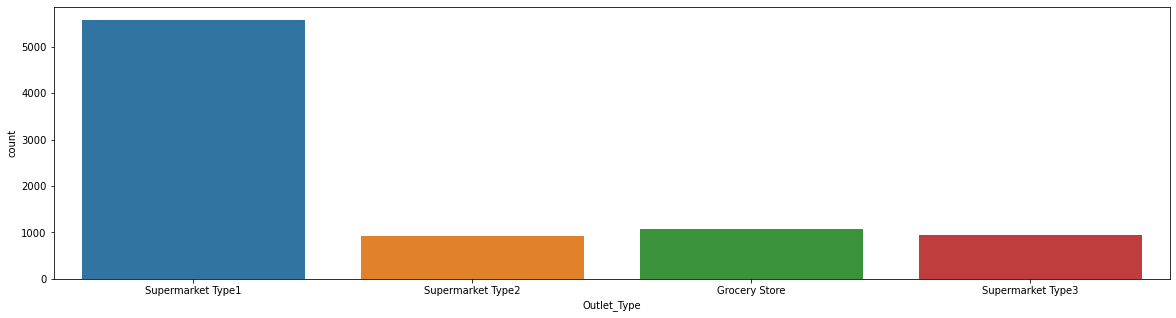

In [317]:
for i in train.drop(['Item_Identifier','Outlet_Identifier'],axis=1).select_dtypes(include=['object']).columns:
    plt.figure(figsize=(20,5))
    sns.countplot(i,data=train)
    
plt.show()

Inferences from categorical univariate analysis
* Item_Fat_content: Duplicates Low Fat and LF and low fat are same, Regular and rg are same, to be combined or replaced
                    count of Low Fat with 5000+ and regular with 3000 approx seems to be normal
                    
* Item_Type : The sale of Item_type fruits and vegetables, snacks, frozen foods , household seems to occupy major chunk of
              sales and starchy foods, breakfast and seafood visualises to be low in terms of sales
              
* Outlet_size : Majority of the outlets are Medium in size followed closely by small. High outlet size are very minimal in
                number
                
* Outlet_location_type : Tier 3 location type occupied the highest followed by tier 2 and tier 1

* Supermarket type1 : outlets majorly belong to Supermarket type1 
                    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

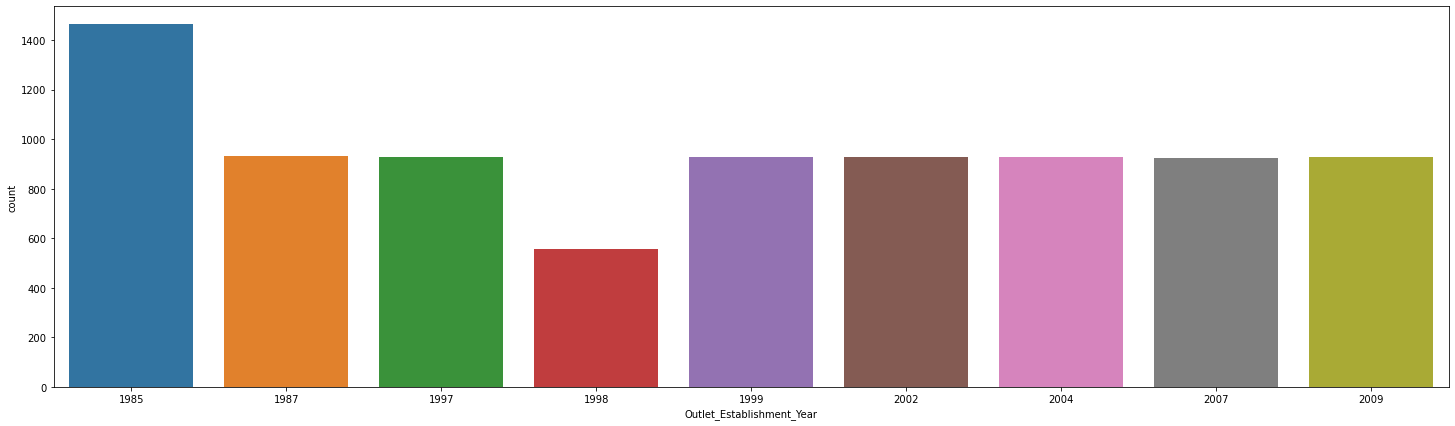

In [73]:
plt.figure(figsize=(25,7))
sns.countplot('Outlet_Establishment_Year',data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

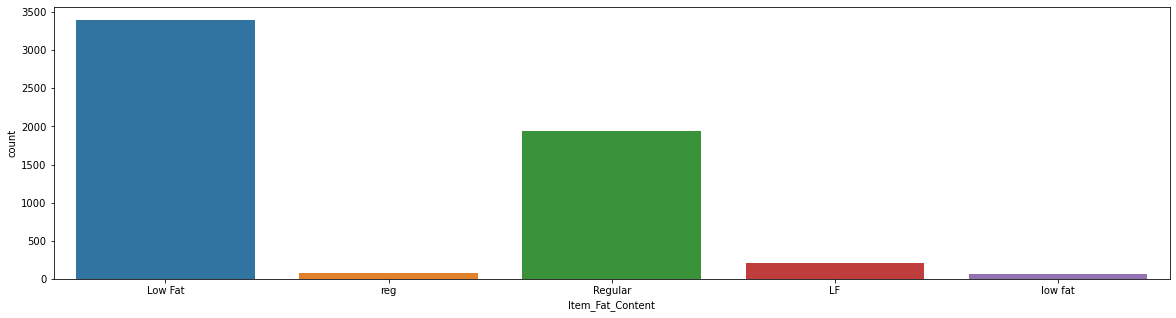

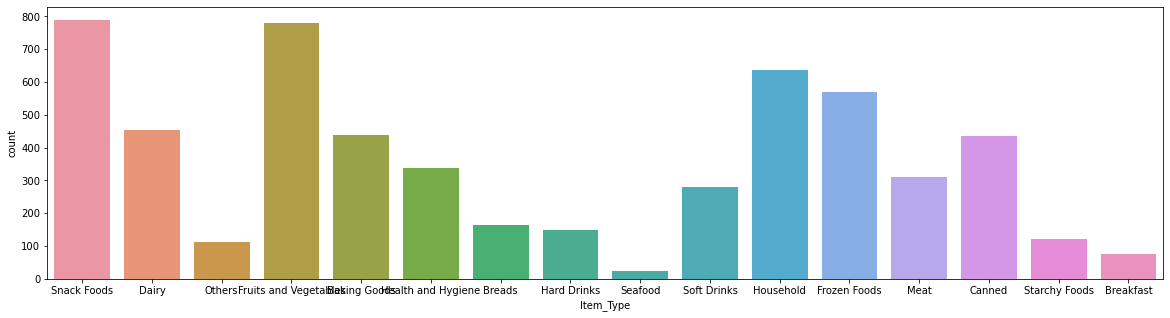

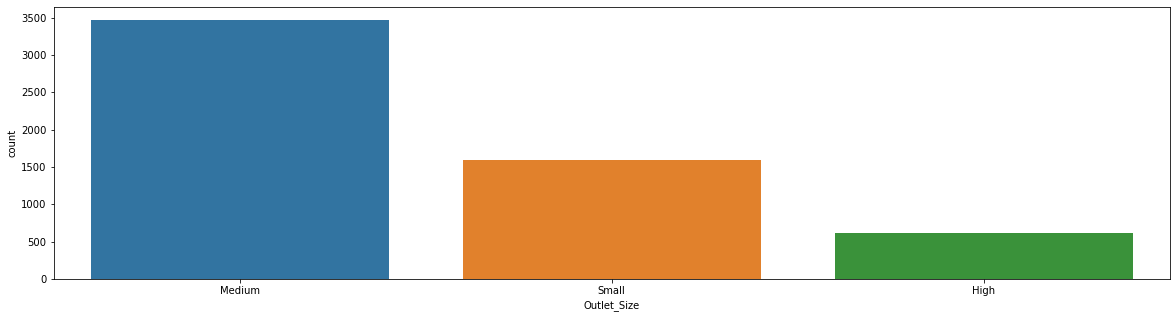

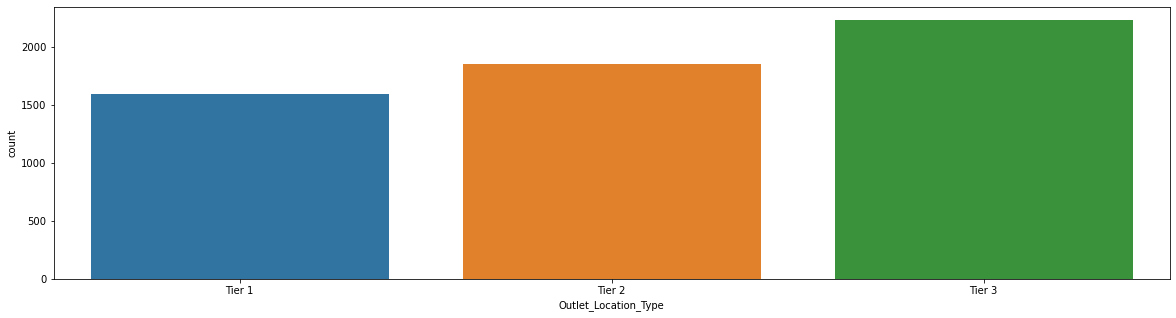

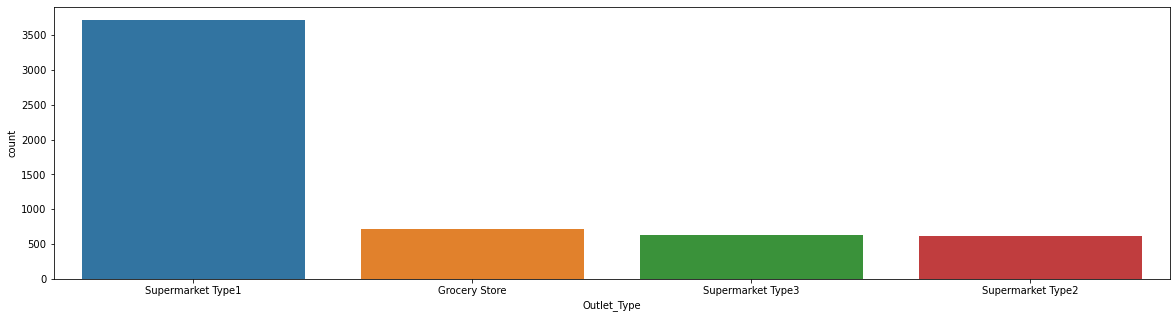

In [318]:
#Univariate analysis for test data categorical features

for i in train.drop(['Item_Identifier','Outlet_Identifier'],axis=1).select_dtypes(include=['object']).columns:
    plt.figure(figsize=(20,5))
    sns.countplot(i,data=test)
    
plt.show()

* Outlet_establishment_year : 1998 has the lowest number of data from observations and no data of outlet establishments
                              between 1986,1988-1996 . Either no new outlets were established or data is not available.

Inferences from categorical univariate analysis for test data is similar to train data

Item_Fat_content: Duplicates Low Fat and LF and low fat are same, Regular and rg are same, to be combined or replaced

              count of Low Fat with 5000+ and regular with 3000 approx seems to be normal
Item_Type : The sale of Item_type fruits and vegetables, snacks, frozen foods , household seems to occupy major chunk of

        sales and starchy foods, breakfast and seafood visualises to be low in terms of sales
Outlet_size : Majority of the outlets are Medium in size followed closely by small. High outlet size are very minimal in

          number
Outlet_location_type : Tier 3 location type occupied the highest followed by tier 2 and tier 1

Supermarket type1 : outlets majorly belong to Supermarket type1

In [426]:
# Updating the Lowfat and regular data of column Item_Fat_content
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

#### Bivariate analysis

Understanding the relation of target variables to features 
We will use scatter plot for continuous variables and violin plot for categorical variables

In [427]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


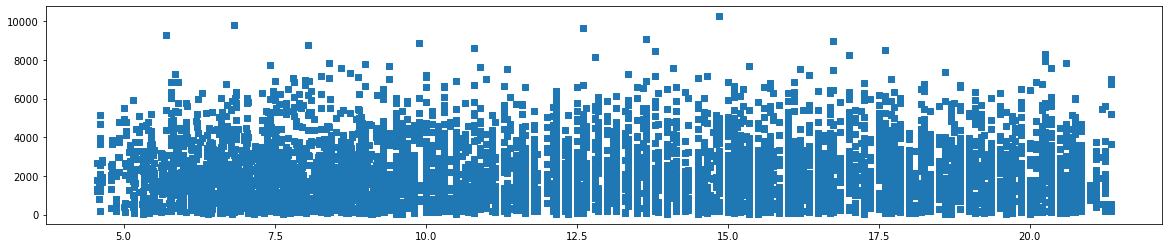

In [68]:
#Item_Weight scatter plot
plt.figure(figsize=(20,4))
plt.scatter(y='Item_Outlet_Sales',x='Item_Weight',data=train,marker='s')
plt.xlabel=('Item_Weight')
plt.ylabel=('Item_Outlet_Sales')

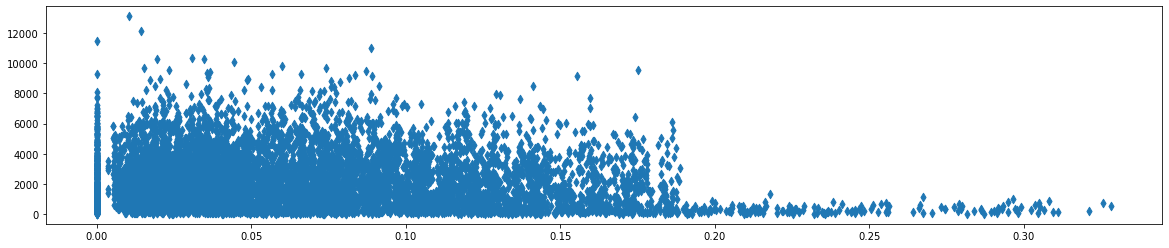

In [65]:
plt.figure(figsize=(20,4))
plt.scatter(y='Item_Outlet_Sales',x='Item_Visibility',data=train,marker='d')
plt.xlabel=('Item_Visibility')
plt.ylabel=('Item_Outlet_Sales')

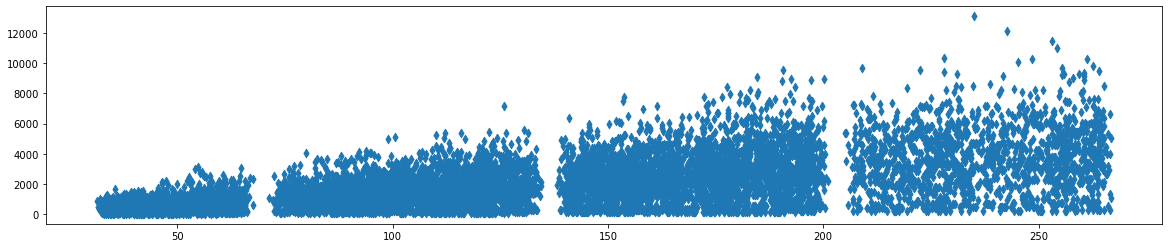

In [38]:
plt.figure(figsize=(20,4))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',marker='d',data=train)
plt.xlabel=('Item_MRP')
plt.ylabel=('Item_Outlet_Sales')

From the bivariate analysis of continuous features to target following can be observed
i) Item weight is continuously distributed over all the weights against sales and no proper pattern is available
ii) As observed in univariate analysis a lot of items are with zero visibility and it is wierd for items with zero visibility contributing for outlet sales.
iii) Item MRP is categorised into 4 bins with gaps

#### Bivariate analysis for categorical variables
we will perform bivariate analysis for categorical variables with violin plot

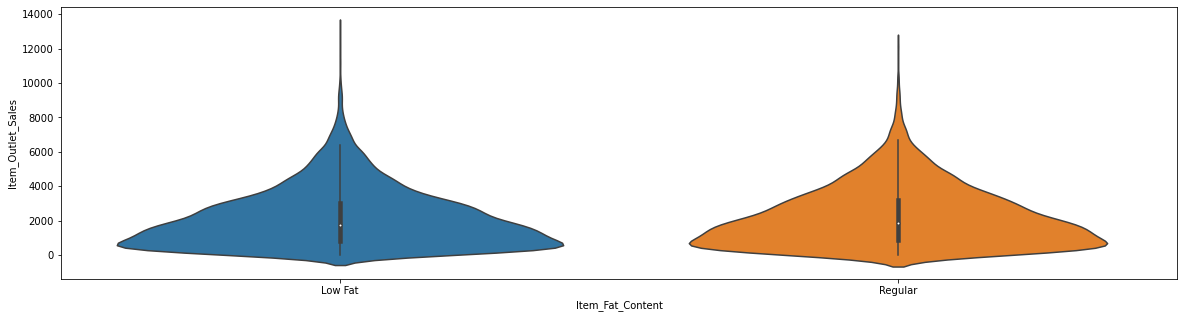

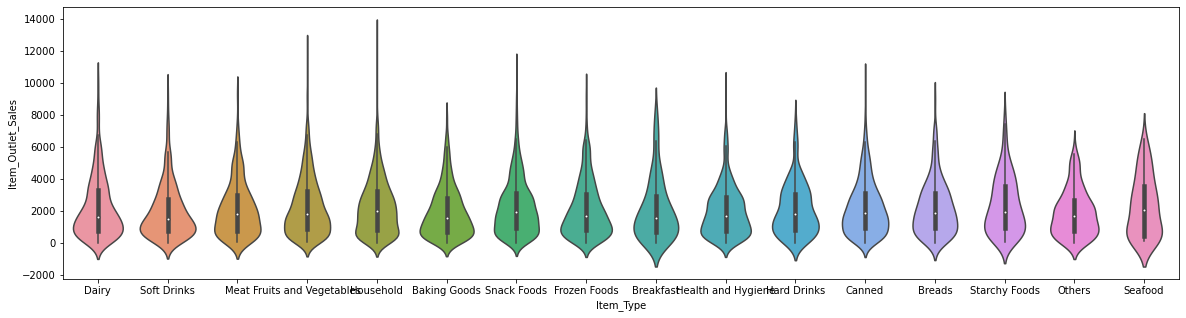

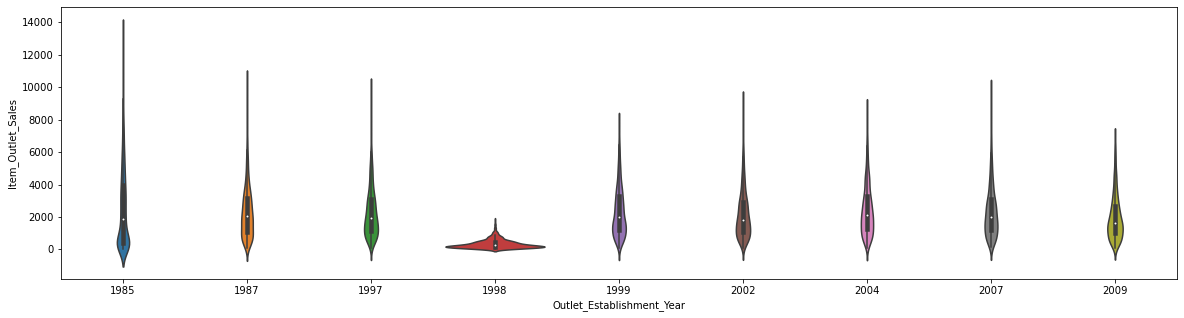

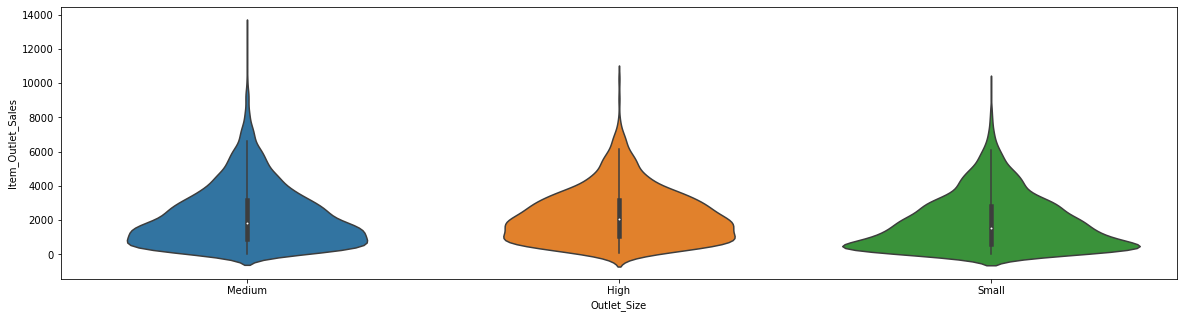

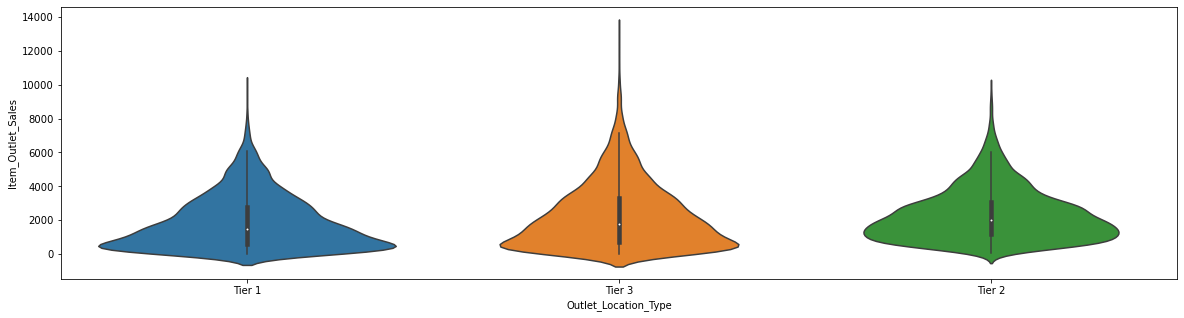

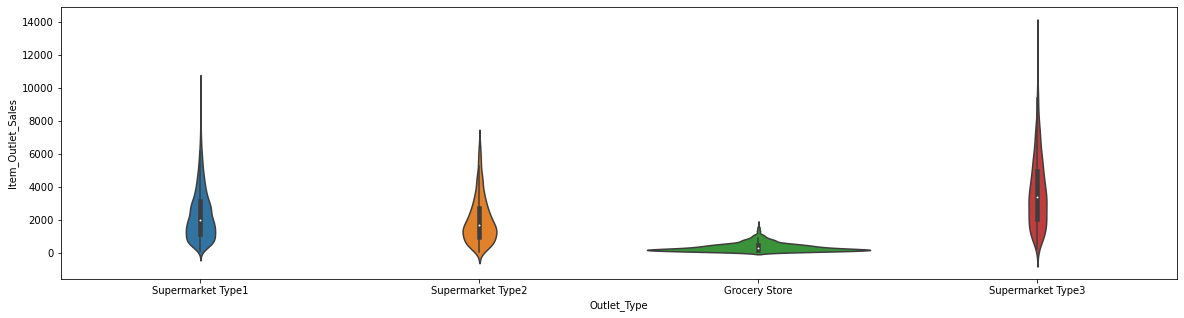

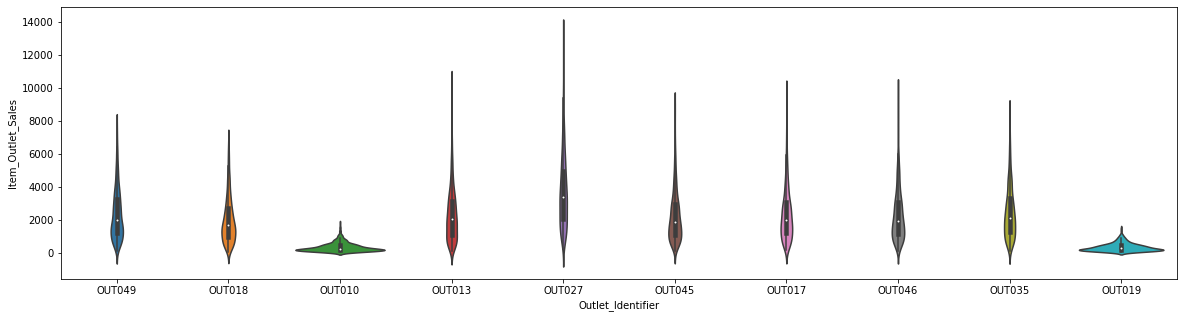

In [428]:
for i in train[['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Identifier']].columns:
    plt.figure(figsize=(20,5))
    sns.violinplot(y='Item_Outlet_Sales',x=i,data=train)

Synopsys of categorical bivariate analysis:
i) The distribtuion of Item_Fat_content , item_type,outlet_size,outlet_location_type are similar and no major observations
ii) target outlet sales for established year 1998 is different and less compared to marts established over other years
iii) In outlet type , the most of data points around lower sales for Grocery store on comparision with other types
iv) Distribution of two outlets OUT010 AND OUT019 in terms of sales is similar and less on comparision with other outlets

### Feature Engineering

* From data violin plot it can be observed that there are multiple type available in item_type, these can be further classified into bins for better performance
* Establishment year can be binned further to trim down

In [73]:
# creating bins of item_type
train['Item_Type'].value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [429]:
# appearantly three bins can be created as follows wth column names
fresh_foods=['Fruits and Vegetables','Dairy','Meat','Breads']
processed_foods=['Snack Foods','Frozen Foods','Canned','Soft Drinks','Hard Drinks','Breakfast','Starchy Foods','Seafood']
others=['Household','Baking Goods','Health and Hygiene','Others']

In [430]:
for i in fresh_foods:
    train.loc[train['Item_Type'] == i, 'Item_Type'] = 'fresh'
for i in processed_foods:
    train.loc[train['Item_Type'] == i, 'Item_Type'] = 'packaged'
for i in others:
    train.loc[train['Item_Type'] == i, 'Item_Type'] = 'other'
    
for i in fresh_foods:
    test.loc[test['Item_Type'] == i, 'Item_Type'] = 'fresh'
for i in processed_foods:
    test.loc[test['Item_Type'] == i, 'Item_Type'] = 'packaged'
for i in others:
    test.loc[test['Item_Type'] == i, 'Item_Type'] = 'other'

In [431]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [432]:
#making bins of year of establishment

eighties=[1985,1987]
nineties=[1997,1998,1999]
millenium=[2002,2004,2007,2009]


In [433]:
for i in eighties:
    train.loc[train['Outlet_Establishment_Year']==i,'Outlet_Establishment_Year'] ='80s'
for i in nineties:
    train.loc[train['Outlet_Establishment_Year']==i,'Outlet_Establishment_Year'] ='90s'
for i in millenium:
    train.loc[train['Outlet_Establishment_Year']==i,'Outlet_Establishment_Year'] ='20s'
    
for i in eighties:
    test.loc[test['Outlet_Establishment_Year']==i,'Outlet_Establishment_Year'] ='80s'
for i in nineties:
    test.loc[test['Outlet_Establishment_Year']==i,'Outlet_Establishment_Year'] ='90s'
for i in millenium:
    test.loc[test['Outlet_Establishment_Year']==i,'Outlet_Establishment_Year'] ='20s'
    

#### Skewness
* skewness was observed in Item_Visibility and will be addressed using the log transform
Continuous Data:

Item_Weight
Item_Visibility
Item_MRP
Item_Outlet_Sales (Target variable)


In [434]:
train.skew()

C:\Users\91990\AppData\Local\Temp/ipykernel_20360/3574648760.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.skew()


Item_Weight          0.082426
Item_Visibility      1.167091
Item_MRP             0.127202
Item_Outlet_Sales    1.177531
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

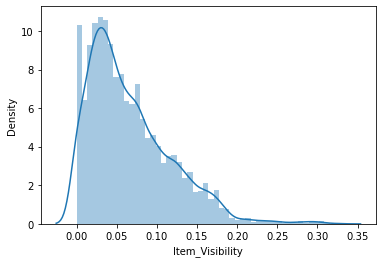

In [114]:
sns.distplot(train['Item_Visibility'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

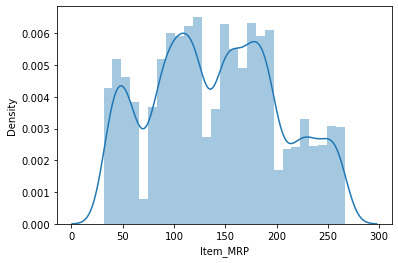

In [104]:
sns.distplot(train['Item_MRP'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

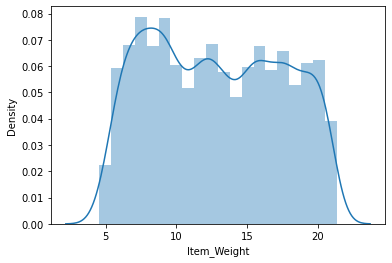

In [106]:
sns.distplot(train['Item_Weight'])

The data is not normally distributed for columns item_visibility ,item_mrp, item_weight and visible skewness in item_visibility which is to be addressed

<AxesSubplot:>

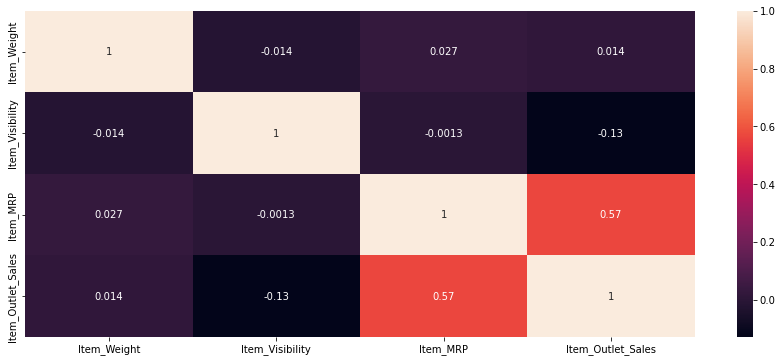

In [121]:
plt.figure(figsize=(15,6))
sns.heatmap(train.corr(), annot=True)

In [137]:
train.corr()['Item_Outlet_Sales']

Item_Weight          0.014123
Item_Visibility     -0.128625
Item_MRP             0.567574
Item_Outlet_Sales    1.000000
Name: Item_Outlet_Sales, dtype: float64

In [435]:
X=train.drop('Item_Outlet_Sales',axis=1)
y=train['Item_Outlet_Sales']

#X=train.iloc[:,:-1]
#y=train.iloc[:,-1]

In [438]:
pow=PowerTransformer(method='yeo-johnson')
X['Item_Visibility']=pow.fit_transform(X[['Item_Visibility']])
test['Item_Visibility']=pow.fit_transform(test[['Item_Visibility']])

In [439]:
X.skew()

C:\Users\91990\AppData\Local\Temp/ipykernel_20360/1164782681.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X.skew()


Item_Weight        0.082426
Item_Visibility    0.011023
Item_MRP           0.127202
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

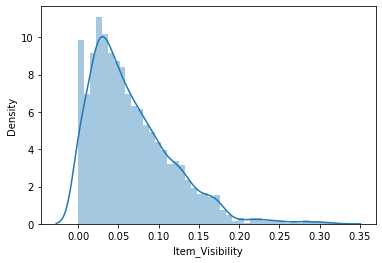

In [176]:
#Addressing the skewness of test data
sns.distplot(test['Item_Visibility'])

In [247]:
#test['Item_Visibility']=pow.fit_transform(test[['Item_Visibility']])

In [440]:
# Dropping the columns
#Item_Identifier and outlet_Identifier  are similar to serial no and have no significance and hence dropping these columns
X=X.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
test=test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

#### Encoding the categorical variables

In [331]:
X.select_dtypes(include=['object']).columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [332]:
X['Item_Fat_Content'].unique() , X['Item_Type'].unique() , X['Outlet_Type'].unique()
#For These Categorical variables we use onehot encoding technique

(array(['Low Fat', 'Regular'], dtype=object),
 array(['fresh', 'packaged', 'other'], dtype=object),
 array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
        'Supermarket Type3'], dtype=object))

In [441]:
one=OneHotEncoder()
onelist=['Item_Fat_Content','Item_Type','Outlet_Type']
for i in onelist:
    one_df=pd.DataFrame(one.fit_transform(X[[i]]).toarray())
    
X=X.join(one_df)

X=X.drop(['Item_Fat_Content','Item_Type','Outlet_Type'],axis=1)

#Applying the same encoding on testing dataset

for i in onelist:
    test_one_df=pd.DataFrame(one.fit_transform(test[[i]]).toarray())
    
test=test.join(test_one_df)

test=test.drop(['Item_Fat_Content','Item_Type','Outlet_Type'],axis=1)

In [442]:
X['Outlet_Size'].unique() , X['Outlet_Location_Type'].unique(),X['Outlet_Establishment_Year'].unique()
#These are the ordinal categorical variables and we use Ordinal Encoder

(array(['Medium', 'High', 'Small'], dtype=object),
 array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object),
 array(['90s', '20s', '80s'], dtype=object))

In [443]:
oe = OrdinalEncoder()
oelist = ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Establishment_Year']
for i in oelist:
    X[i] = oe.fit_transform(X[i].values.reshape(-1,1).astype(str))

    
#Applying ordinal encoder for test data
for i in oelist:
    test[i]=oe.fit_transform(test[i].values.reshape(-1,1).astype(str))

#### Scaling of the data

In [444]:
#using the standard scaler
sc=StandardScaler()
X=sc.fit_transform(X)
test=sc.fit_transform(X)

In [445]:
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors=5)
X = pd.DataFrame(knnimp.fit_transform(X))
test=pd.DataFrame(knnimp.fit_transform(test))

In [446]:
X.isnull().sum().sum()

0

In [447]:
test.isnull().sum().sum()

0

Till this step we have performed the following steps on train and test datasets
* Univariate Analysis
* Bivariate Analysis
* Missing value treatment of Outlet_size (Categorical)
* Feature Engineering
* Splitting the data to features and target
* Preprocessing data by removing skewness
* Encoding of categorical variables using One hot encoder and ordinal encoder
* Null imputation in Item_Weight using KNN imputation technique

Lets proceed with next part which is model building. This is a Regression problem as we have to predict the outlet sales

We have two data sets 
i) train data divided to X (features) and y(target) used for training the data
ii) Test data set which will only be used for testing the model 

X and y will be used for building the model

##  Model Building


In [448]:
models=[KNeighborsRegressor(), SVR(), LinearRegression(), RandomForestRegressor()] 

In [449]:
maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(X,y)
    p=m.predict(test)
    
    mae=mean_absolute_error(p,y)
    mse=mean_squared_error(p,y)
    rmse=np.sqrt(mean_squared_error(p,y))
    r2=r2_score(y,p)
    
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)

    
    print("*",m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2,'\n')
    print('----------------------------------------------------------------------------------------------------')

In [450]:
for i in models:
    create_model(i)

* KNeighborsRegressor()
Mean absolute error 666.8938399530682
Mean squared error 907832.7013898715
Root Mean squared error 952.8025511037802
R2 Score 0.6882227719428347 

----------------------------------------------------------------------------------------------------
* SVR()
Mean absolute error 1151.2851936461643
Mean squared error 2546810.5630181767
Root Mean squared error 1595.8729783470164
R2 Score 0.12534816546169547 

----------------------------------------------------------------------------------------------------
* LinearRegression()
Mean absolute error 836.3600841935609
Mean squared error 1274762.9032973396
Root Mean squared error 1129.05398599772
R2 Score 0.562207834316087 

----------------------------------------------------------------------------------------------------
* RandomForestRegressor()
Mean absolute error 296.2173119296023
Mean squared error 182081.63939599652
Root Mean squared error 426.7102522742997
R2 Score 0.9374676537603501 

--------------------------

In [451]:
def cross_val(model_name,model,X,y,cv):
    
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)*100}')

In [452]:
# cross validation score for KNeighborsRegressor()
KNN=KNeighborsRegressor()
cross_val(KNN,KNeighborsRegressor(),X,y,10)

KNeighborsRegressor() Scores:
0.53
0.55
0.53
0.52
0.44
0.55
0.55
0.5
0.57
0.5
Average KNeighborsRegressor() score: 52.0


In [453]:
# cross validation score for SVR()
SVR_rbf=SVR()
cross_val(SVR_rbf,SVR(),X,y,10)

SVR() Scores:
0.09
0.1
0.13
0.11
0.12
0.09
0.1
0.12
0.12
0.11
Average SVR() score: 11.0


In [454]:
# cross validation score for LinearRegression().
LR = LinearRegression(normalize=True)
cross_val(LR,LinearRegression(),X,y,10)

LinearRegression(normalize=True) Scores:
0.56
0.58
0.54
0.56
0.51
0.58
0.58
0.55
0.58
0.55
Average LinearRegression(normalize=True) score: 56.00000000000001


In [455]:
# cross validation score for RandomForestRegressor()
RF=RandomForestRegressor()
cross_val(RF,RandomForestRegressor(),X,y,10)

RandomForestRegressor() Scores:
0.55
0.57
0.5
0.56
0.48
0.56
0.57
0.54
0.58
0.52
Average RandomForestRegressor() score: 54.0


Average scores of three models are
* Linear Regression : 56
* Random Forest Regressor : 54
* KNN regressor : 52

Linear Regression has 56% with 
* Mean absolute error 836.3600841935609
* Mean squared error 1274762.9032973396
* Root Mean squared error 1129.05398599772
* R2 Score 0.562207834316087

We will consider Linear Regression for building and saving the model

## Saving the model / Serialisation of model

In [462]:
LR.fit(X,y)

import pickle  #SAVING THE MODEL
filename = 'Big_data_mart_sales.pkl'
pickle.dump(LR,open (filename,'wb'))

C:\Users\91990\AppData\Local\Temp/ipykernel_20360/768808980.py:5: ResourceWarning: unclosed file <_io.BufferedWriter name='Big_data_mart_sales.pkl'>
  pickle.dump(LR,open (filename,'wb'))


#### Assessing the importance of features on outlet sales

Feature: 0, Score: 6.31053
Feature: 1, Score: -15.73538
Feature: 2, Score: 968.81581
Feature: 3, Score: -2.81857
Feature: 4, Score: 17.44254
Feature: 5, Score: 7.94596
Feature: 6, Score: -581.57759
Feature: 7, Score: 102.14413
Feature: 8, Score: -38.18274
Feature: 9, Score: 502.39975


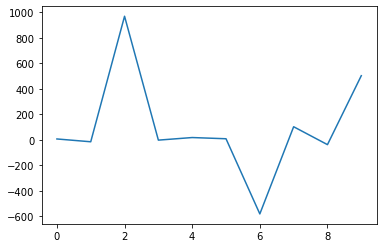

In [467]:
importance=LR.coef_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.plot([x for x in range(len(importance))], importance)
#pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
    

### Inferences: 

* Item_MRP seems to have highest importance on the outlet sales
* Outlet type (Super market type 1 ) has good impact on the total outlet sales